In [106]:
# Importing the necessary modules (pandas, numpy, matplotlib.pyplot, seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Milestone 1: Data Exploration and Preparation

In [116]:
df = pd.read_csv("housing_price_dataset.csv")
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065
...,...,...,...,...,...,...
49995,1282,5,3,Rural,1975,100080.865895
49996,2854,2,2,Suburb,1988,374507.656727
49997,2979,5,3,Suburb,1962,384110.555590
49998,2596,5,2,Rural,1984,380512.685957


In [117]:
df.shape

(50000, 6)

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


# Data Cleaning

In [119]:
#check missing value 
missing_values = df.isnull().sum()
missing_values 

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [120]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)


number of duplicate rows:  (0, 6)


In [121]:
# Display basic statistics
df.describe()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2006.374680,3.498700,1.995420,1985.404420,224827.325151
std,575.513241,1.116326,0.815851,20.719377,76141.842966
min,1000.000000,2.000000,1.000000,1950.000000,-36588.165397
25%,1513.000000,3.000000,1.000000,1967.000000,169955.860225
50%,2007.000000,3.000000,2.000000,1985.000000,225052.141166
75%,2506.000000,4.000000,3.000000,2003.000000,279373.630052
max,2999.000000,5.000000,3.000000,2021.000000,492195.259972


In [122]:
# Applying one-Hot Encoding 
df = pd.get_dummies(df, columns=['Neighborhood'], drop_first= 0)
df.head

<bound method NDFrame.head of        SquareFeet  Bedrooms  Bathrooms  YearBuilt          Price  \
0            2126         4          1       1969  215355.283618   
1            2459         3          2       1980  195014.221626   
2            1860         2          1       1970  306891.012076   
3            2294         2          1       1996  206786.787153   
4            2130         5          2       2001  272436.239065   
...           ...       ...        ...        ...            ...   
49995        1282         5          3       1975  100080.865895   
49996        2854         2          2       1988  374507.656727   
49997        2979         5          3       1962  384110.555590   
49998        2596         5          2       1984  380512.685957   
49999        1572         5          3       2011  221618.583218   

       Neighborhood_Rural  Neighborhood_Suburb  Neighborhood_Urban  
0                       1                    0                   0  
1              

In [123]:
# Features and target variable
X = df[['SquareFeet', 'Bedrooms']]
y = df['Price'] # Target Variable 


In [124]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Milestone 2: Model Development

# Model Selection
Linear Regression 

 3. Model Training:

In [125]:
# Step 3: Train a Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

4. Model Evaluation:

In [126]:
# Step 4: Evaluate the Model
y_pred = model.predict(X_test)

In [127]:
# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")

Mean Squared Error: 2441023648.257366
R-squared Value: 0.57473110070626


In [138]:
#Train the Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.29921157597777776


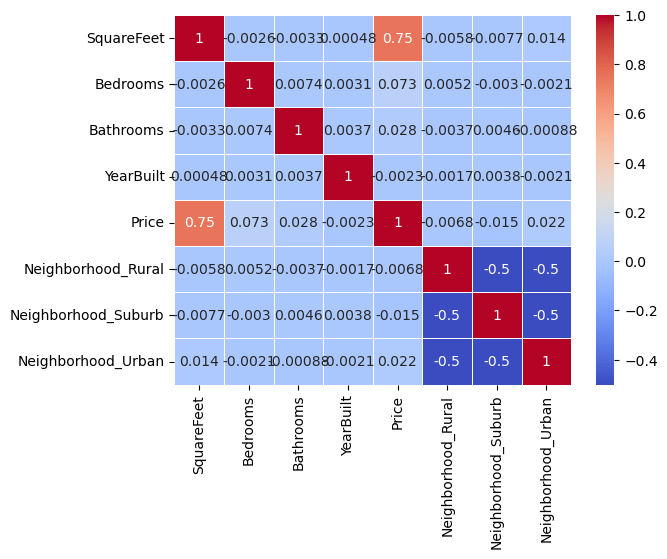

In [139]:
# correlation matrix,where price seems to be highly correlated to squarefeet  of the house
corr=df.corr()
corr
sns.heatmap(corr,annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


#  Reporting and Documentation
- This datasets has continuous variable like price.
- For continuous variable we use regression 
- The Mean Squared Error: 2441023648.257366 and the prediction errors are significant.
- The R-squared value of 0.57 indicates that the model explains a little more than half of the variation in the target variable, but there is room for improving the model's accuracy.
